Emilia Zielinska <br>
300018129 <br>
CSI 5155 <br>
Dr. Herna Viktor <br>
March 13, 2024

# Assignment 2 - Explainable AI (XAI)
## Model Construction
### Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = pd.read_csv('./data/heart.csv', sep=',')
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df['age'] = (df['age'] - 29) / (77 - 29)
df['cp'] = df['cp'] / 3
df['trtbps'] = (df['trtbps'] - 94) / (200 - 94)
df['chol'] = (df['chol'] - 126) / (564 - 126)
df['thalachh'] = (df['thalachh'] - 71) / (202 - 71)

df['restecg_normal'] = df['restecg'].replace({0:1, 1:0, 2:0})
df['restecg_abnormal'] = df['restecg'].replace({2:0})
df['restecg_hypertrophy'] = df['restecg'].replace({1:0, 2:1})

df.drop(['restecg', 'oldpeak', 'slp', 'caa', 'thall'], axis=1, inplace=True)
df.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output,restecg_normal,restecg_abnormal,restecg_hypertrophy
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.600358,0.326733,0.544554,0.485149,0.501650,0.013201
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.174849,0.469794,0.498835,0.500606,0.500824,0.114325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.625954,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.725191,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training

In [4]:
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Model Evaluation

In [5]:
def evaluate(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, 
        annot=True,
        fmt='g', 
        xticklabels=['Less Chance','More Chance'],
        yticklabels=['Less Chance','More Chance'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix', fontsize=17)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    
    return y_pred

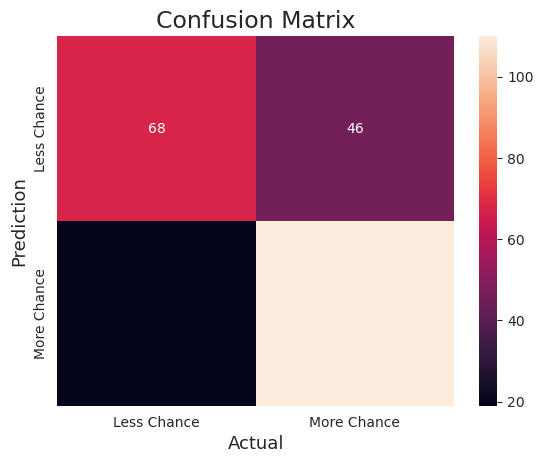

Accuracy: 0.7325102880658436
Precision: 0.7051282051282052
Recall: 0.8527131782945736


In [6]:
pred = evaluate(rf)

## Apply SHAP and Interpret SHAP Values

In [7]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X, y)

## Visualizations
### Summary Plot

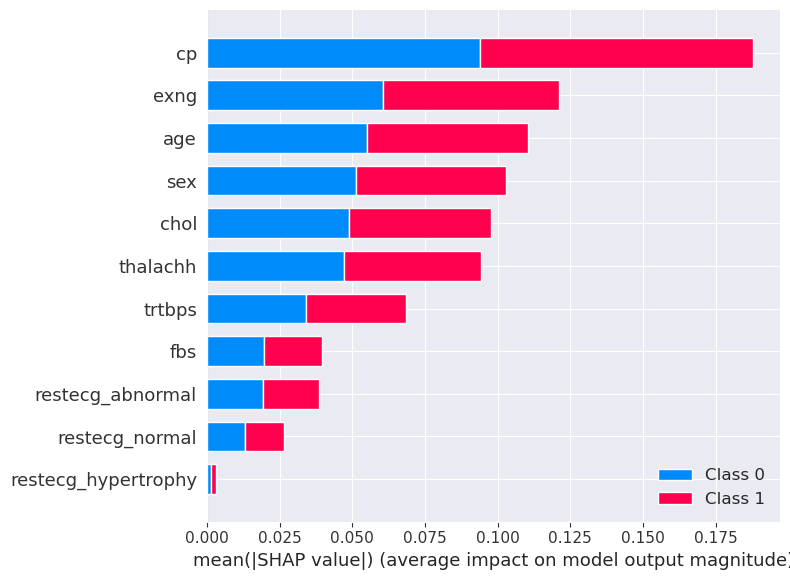

In [8]:
shap.summary_plot(shap_values, X)

### Force Plot

In [9]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

### Dependence Plots // Interaction Plots

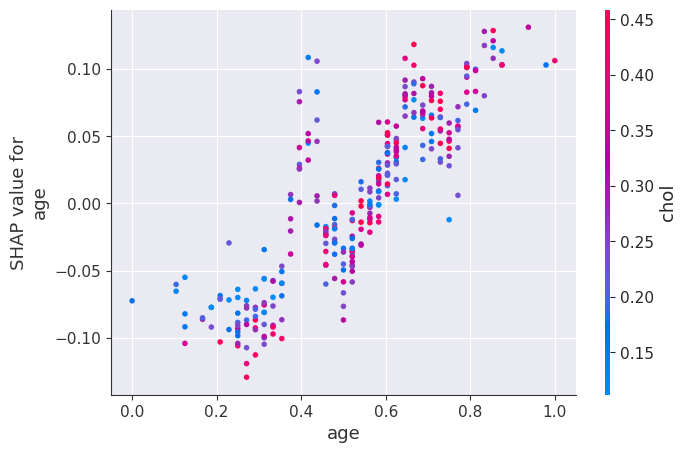

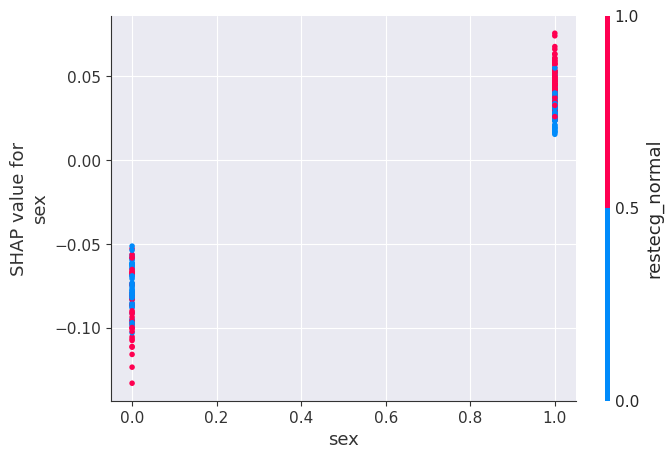

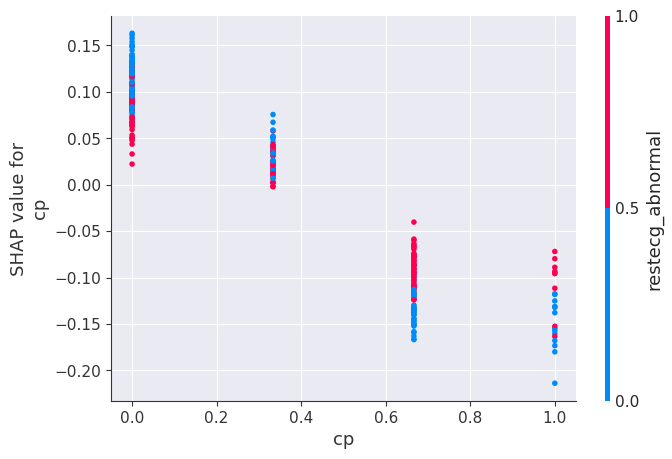

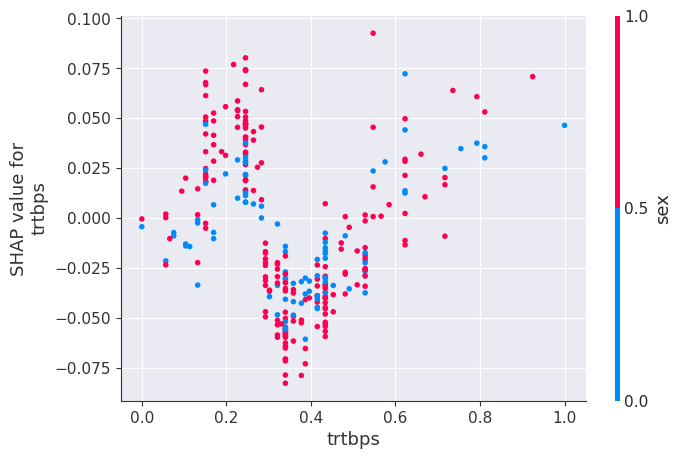

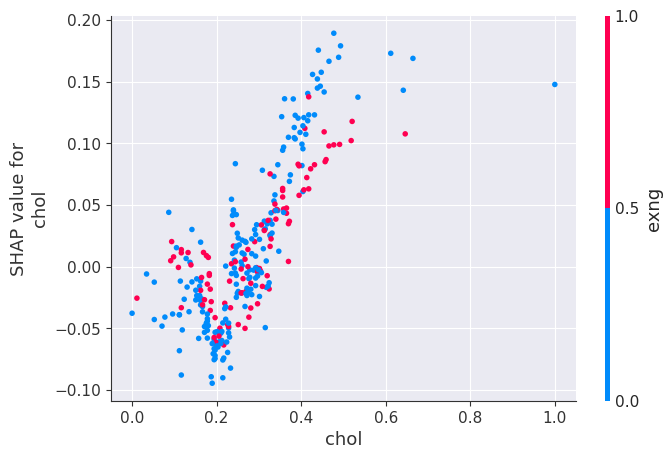

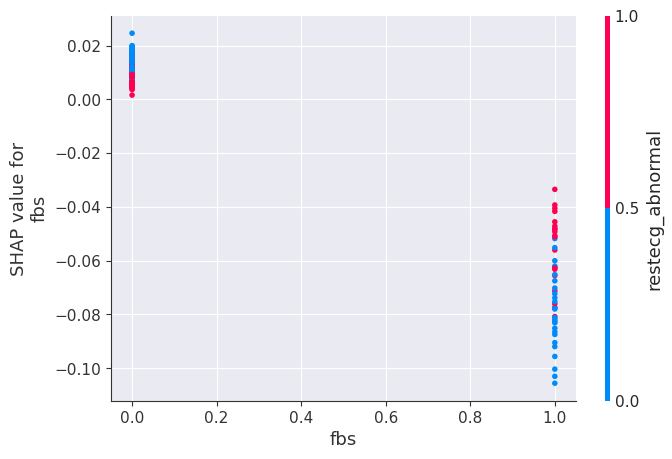

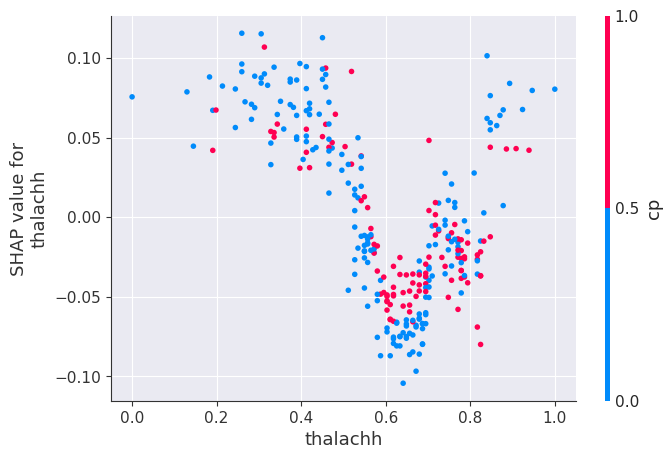

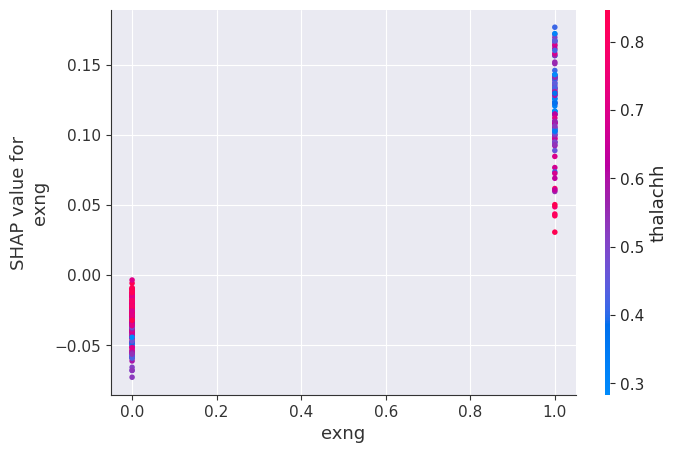

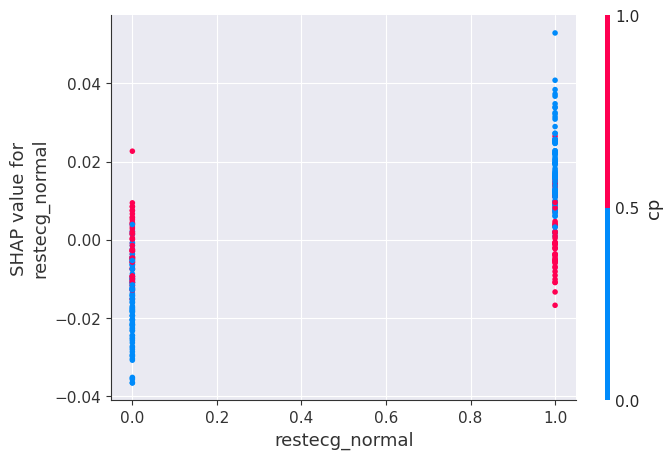

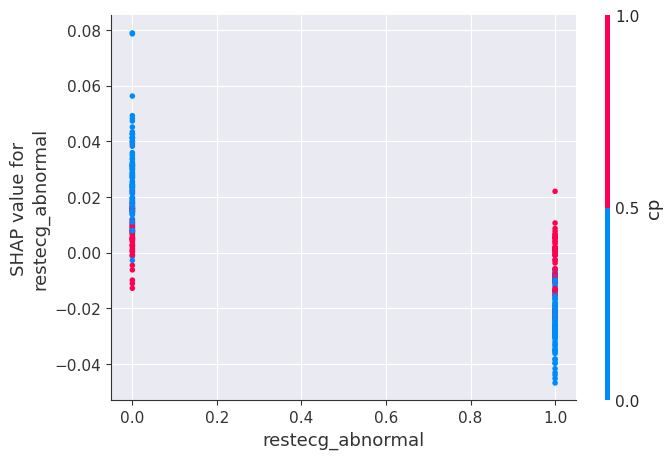

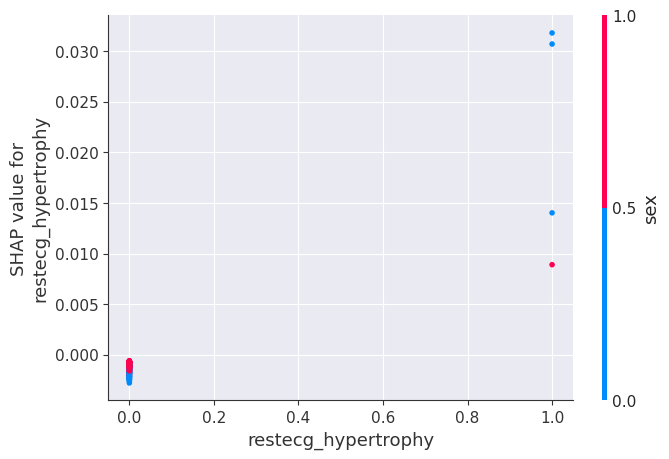

In [10]:
shap.dependence_plot(0, shap_values[0], X)
shap.dependence_plot(1, shap_values[0], X)
shap.dependence_plot(2, shap_values[0], X)
shap.dependence_plot(3, shap_values[0], X)
shap.dependence_plot(4, shap_values[0], X)
shap.dependence_plot(5, shap_values[0], X)
shap.dependence_plot(6, shap_values[0], X)
shap.dependence_plot(7, shap_values[0], X)
shap.dependence_plot(8, shap_values[0], X)
shap.dependence_plot(9, shap_values[0], X)
shap.dependence_plot(10, shap_values[0], X)

### Waterfall Plot

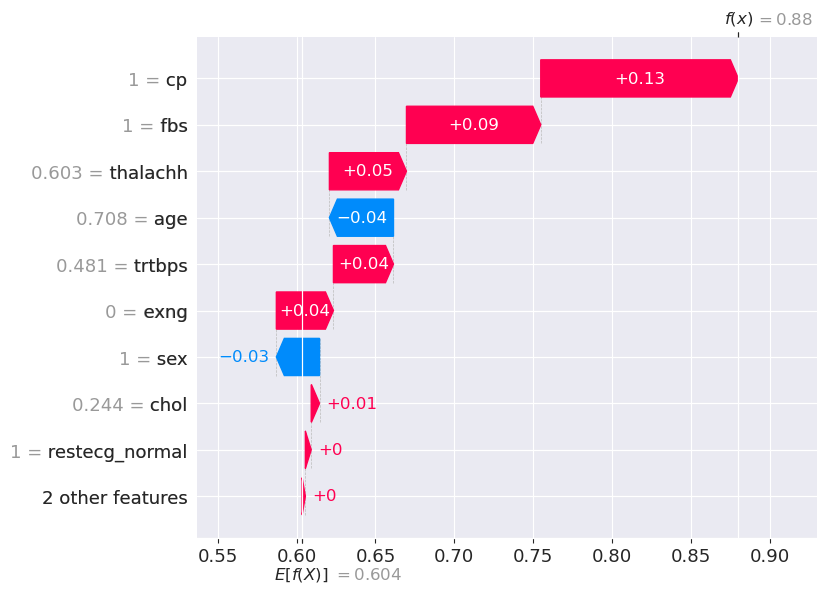

In [13]:
shap.waterfall_plot(explainer(X)[0,:,1])

### Decision Plot

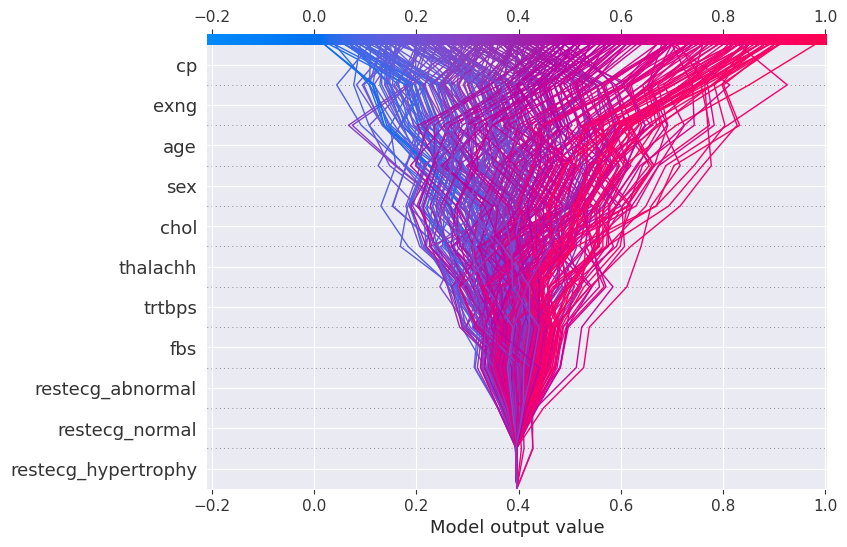

In [12]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X)